### Given a Gene (and optionally a disease), Get the drugs associated with it

In [4]:
import pandas as pd
DGIDB = pd.read_csv("../Data/DGIDB/DrugToGene.tsv", sep="\t")


In [ ]:
def get_drugs_for_gene(gene_name):
    return DGIDB[DGIDB['gene_name'] == gene_name]['drug_name'].dropna().unique().tolist()
print(get_drugs_for_gene("BRAF"))
# Good 

['SELUMETINIB', 'NVP-TAE 226', 'RG-7256', 'CETUXIMAB', 'OSIMERTINIB', 'ALPELISIB', 'DNA-DEPENDENT PROTEIN KINASE-TARGETING SIDNA DT01', 'BRAFV600/PI3K INHIBITOR ASN003', 'HSP90 INHIBITOR XL888', 'MAP855', 'ENZALUTAMIDE', 'RAF-265', 'BINIMETINIB', 'PAN-RAF INHIBITOR LY3009120', 'GEDATOLISIB', 'PEMBROLIZUMAB', 'BI-847325', 'RABEPRAZOLE', 'RAF INHIBITOR BDTX-4933', 'FICERAFUSP ALFA', 'BRAF(V600E) KINASE INHIBITOR ABM-1310', 'PILARALISIB', 'DASATINIB ANHYDROUS', 'SORAFENIB', 'PLX8394', 'ATEZOLIZUMAB', 'PANITUMUMAB', 'CCT196969', 'NAB-PACLITAXEL', 'MOCETINOSTAT', 'TIZATERKIB', 'CFT1946', 'SAPITINIB', 'NIVOLUMAB', 'IRINOTECAN HYDROCHLORIDE', 'ABEMACICLIB', 'MITOGEN-ACTIVATED PROTEIN KINASE KINASE INHIBITOR', 'PYRVINIUM', 'XL281', 'REGORAFENIB', 'U0126', 'REFAMETINIB', 'CRIZOTINIB', 'LENVATINIB', 'TEMSIROLIMUS', 'GEFITINIB', 'AFATINIB', 'YM-254890', 'AKT INHIBITOR MK2206', 'DACTOLISIB', 'ALECTINIB', 'TRAMETINIB DIMETHYL SULFOXIDE', 'OBATOCLAX', 'TOVORAFENIB', 'DABRAFENIB', 'VEMURAFENIB', 'CCT

In [5]:
def get_genes_for_drug(drug_name):
    return DGIDB[DGIDB['drug_name'] == drug_name]['gene_name'].dropna().unique().tolist()

bipolar_drugs = ['CLONAZEPAM', 'BUPROPION', 'SERTRALINE', 'OLANZAPINE', 'ZIPRASIDONE', 'QUETIAPINE', 'CHLORPROMAZINE', 'CARBAMAZEPINE', 'ALLOPURINOL', 'PERPHENAZINE', 'VALPROIC ACID', 'CLOZAPINE', 'LITHIUM', 'RISPERIDONE', 'LAMOTRIGINE', 'ARIPIPRAZOLE']


In [7]:
print(get_genes_for_drug("CLOZAPINE"))

['DRD2', 'SRC', 'CYP3A43', 'ABCG2', 'CYP1A1', 'SERPINA3', 'HLA-C', 'AMD1', 'GSTT1', 'HTR2A', 'SH2B1', 'C3', 'UGT2B10', 'ABCC1', 'HLA-DRB5', 'GRIN2B', 'CYP2C18', 'UGT1A1', 'A1BG', 'A2MP1', 'NATP', 'GLP1R', 'GFRA2', 'GDNF', 'MTHFR', 'CYP2C19', 'NT5E', 'HTR1A', 'NFIB', 'HLA-DRB3', 'ABCA4', 'ABCD1', 'ALDH2', 'HTR3A', 'GSTM1', 'CYP2D6', 'AMELX', 'MIR1912', 'FAAH', 'CYP3A4', 'DRD1', 'HTR7', 'MIR1264', 'AOC1', 'CHRM1', 'TRAC', 'ABCB7', 'ALDH3A1', 'PIK3CG', 'HTR2C', 'POLI', 'FASN', 'IL2', 'ELAVL2', 'CCKBR', 'PRKAB2', 'HLA-DPB1', 'MC4R', 'ABCF1', 'SLC1A1', 'LEP', 'ITIH3', 'TBC1D1', 'PRL', 'GCG', 'DTNBP1', 'HLA-B', 'TRAT1', 'RABEP1', 'EPM2A', 'FKBP5', 'SLC6A4', 'NAT2', 'ALDH1A1', 'SLC6A3', 'CYP1A2', 'OXT', 'AADAC', 'CBX1', 'JUND', 'KCNJ3', 'CYP2C9', 'UGT1A4', 'PRKAA2', 'NTRK2', 'HNMT', 'NQO2', 'A2M', 'ALCAM', 'HRH4', 'DRD4', 'HRH1']


In [9]:
bipolar_drugs = [
    'CLONAZEPAM', 'BUPROPION', 'SERTRALINE', 'OLANZAPINE', 'ZIPRASIDONE', 'QUETIAPINE',
    'CHLORPROMAZINE', 'CARBAMAZEPINE', 'ALLOPURINOL', 'PERPHENAZINE', 'VALPROIC ACID',
    'CLOZAPINE', 'LITHIUM', 'RISPERIDONE', 'LAMOTRIGINE', 'ARIPIPRAZOLE'
]

# Get gene targets for CLOZAPINE
clozapine_genes = set(get_genes_for_drug('CLOZAPINE'))

# Get combined gene targets for all other drugs except OLANZAPINE and CLOZAPINE
other_genes = set()
for drug in bipolar_drugs:
    if drug not in {'CLOZAPINE'}:
        other_genes.update(get_genes_for_drug(drug))

# Identify genes uniquely targeted by CLOZAPINE (excluding shared genes)
unique_clozapine_targets = clozapine_genes - other_genes

print("Genes uniquely targeted by CLOZAPINE (excluding all others except OLANZAPINE):")
print(unique_clozapine_targets)

Genes uniquely targeted by CLOZAPINE (excluding all others except OLANZAPINE):
{'SRC', 'KCNJ3', 'GFRA2', 'GDNF', 'JUND', 'AADAC', 'ITIH3', 'OXT', 'PIK3CG', 'NQO2', 'HNMT', 'POLI', 'TRAT1', 'ELAVL2', 'GSTM1', 'NT5E', 'C3', 'HRH4', 'SLC6A4', 'IL2', 'HLA-DRB5', 'DTNBP1', 'TRAC', 'AMELX', 'HLA-DRB3', 'GSTT1', 'ABCC1', 'HLA-DPB1', 'SLC6A3', 'CYP2C18'}


In [38]:
top_perturbs = pd.read_csv("TOP.csv")
filtered = top_perturbs[top_perturbs["Drug"] == "CLOZAPINE"]
# filtered["GeneIndex"].toarray()
print(filtered["GeneIndex"].values)

[17461 17490 15885  9910  1192 15959 17766 15588 11873  6826  4559 15625
  9913  3389  9067 13484 13049 16993 11974  9599]


In [ ]:
import numpy as np
from scipy.sparse import csr_matrix

# Load sparse matrix as before
loader = np.load('../Gen_Hypergraph/output/MSigDB_FULL/hypergraph_incidence_matrix_binary.npz')
H = csr_matrix((loader['data'], loader['indices'], loader['indptr']), shape=loader['shape'])

node_index = 14470
otherNodes = filtered["GeneIndex"].values

# Get the row vector for the main node
node_row = H.getrow(node_index)
node_connections = node_row.count_nonzero()
print(f"Node {node_index} has {node_connections} hyperedges.")

for other_node in otherNodes:
    other_row = H.getrow(other_node)
    other_connections = other_row.count_nonzero()
    shared_edges = node_row.multiply(other_row)  # element-wise AND
    shared_count = shared_edges.count_nonzero()

    node_connections = node_row.count_nonzero()
    pct_shared_with_node = (shared_count / node_connections) * 100 if node_connections > 0 else 0
    pct_shared_with_other = (shared_count / other_connections) * 100 if other_connections > 0 else 0

    print(f"Node {other_node} has {other_connections} hyperedges.")
    print(f"Nodes {node_index} and {other_node} share {shared_count} hyperedges.")
    print(f"Shared edges are {pct_shared_with_node:.2f}% of node {node_index}'s total, "
          f"and {pct_shared_with_other:.2f}% of node {other_node}'s total.\n")

Node 14470 has 537 hyperedges.
Node 17461 has 252 hyperedges.
Nodes 14470 and 17461 share 52 hyperedges.
Shared edges are 9.68% of node 14470's total, and 20.63% of node 17461's total.

Node 17490 has 329 hyperedges.
Nodes 14470 and 17490 share 66 hyperedges.
Shared edges are 12.29% of node 14470's total, and 20.06% of node 17490's total.

Node 15885 has 121 hyperedges.
Nodes 14470 and 15885 share 26 hyperedges.
Shared edges are 4.84% of node 14470's total, and 21.49% of node 15885's total.

Node 9910 has 191 hyperedges.
Nodes 14470 and 9910 share 22 hyperedges.
Shared edges are 4.10% of node 14470's total, and 11.52% of node 9910's total.

Node 1192 has 157 hyperedges.
Nodes 14470 and 1192 share 27 hyperedges.
Shared edges are 5.03% of node 14470's total, and 17.20% of node 1192's total.

Node 15959 has 172 hyperedges.
Nodes 14470 and 15959 share 18 hyperedges.
Shared edges are 3.35% of node 14470's total, and 10.47% of node 15959's total.

Node 17766 has 150 hyperedges.
Nodes 14470 a

In [41]:
import numpy as np
from scipy.sparse import csr_matrix

# Load sparse matrix
loader = np.load('../Gen_Hypergraph/output/MSigDB_FULL/hypergraph_incidence_matrix_binary.npz')
H = csr_matrix((loader['data'], loader['indices'], loader['indptr']), shape=loader['shape'])

node_index = 17056

# Get the row vector for the node of interest
node_row = H.getrow(node_index)

# Compute shared hyperedges count with all nodes
shared_counts = H.dot(node_row.T).toarray().ravel()

# Exclude self
shared_counts[node_index] = 0

# Get top 5 nodes by shared counts
top5_indices = np.argpartition(-shared_counts, 5)[:5]
top5_indices = top5_indices[np.argsort(-shared_counts[top5_indices])]

print(f"Top 5 nodes that share the most hyperedges with node {node_index}:")

for idx in top5_indices:
    total_edges = H.getrow(idx).count_nonzero()
    print(f"Node {idx} shares {shared_counts[idx]} hyperedges with node {node_index} and has total {total_edges} hyperedges.")


Top 5 nodes that share the most hyperedges with node 17056:
Node 14470 shares 126 hyperedges with node 17056 and has total 537 hyperedges.
Node 8650 shares 116 hyperedges with node 17056 and has total 406 hyperedges.
Node 14471 shares 114 hyperedges with node 17056 and has total 506 hyperedges.
Node 13095 shares 111 hyperedges with node 17056 and has total 431 hyperedges.
Node 9287 shares 109 hyperedges with node 17056 and has total 420 hyperedges.


In [44]:
import numpy as np
from scipy.sparse import csr_matrix

# Load the sparse matrix
loader = np.load('../Gen_Hypergraph/output/MSigDB_FULL/hypergraph_incidence_matrix_binary.npz')
H = csr_matrix((loader['data'], loader['indices'], loader['indptr']), shape=loader['shape'])

# Compute degrees (number of hyperedges per node)
node_degrees = H.sum(axis=1).A1

# Get the degree of the node of interest
target_index = 17056
target_degree = node_degrees[target_index]

# Calculate the percentile of the target node's degree
percentile = np.sum(node_degrees <= target_degree) / len(node_degrees) * 100

print(f"Node {target_index} has {target_degree} hyperedges.")
print(f"This places it in the {percentile:.2f}th percentile.")


Node 17056 has 284 hyperedges.
This places it in the 99.87th percentile.


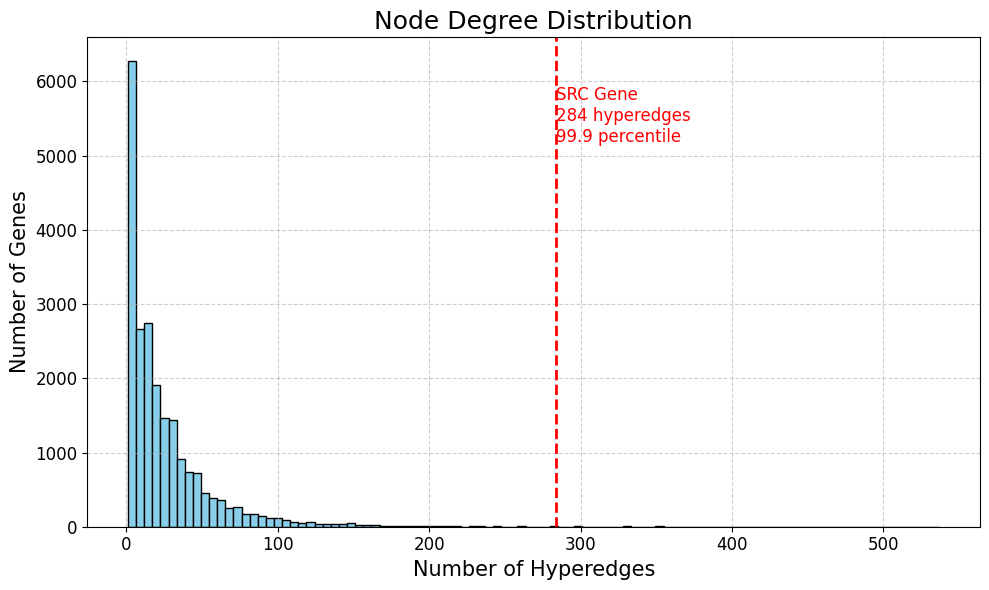

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

# Load the sparse matrix
loader = np.load('../Gen_Hypergraph/output/MSigDB_FULL/hypergraph_incidence_matrix_binary.npz')
H = csr_matrix((loader['data'], loader['indices'], loader['indptr']), shape=loader['shape'])

# Compute degrees (number of hyperedges per node)
node_degrees = H.sum(axis=1).A1

# Target node
target_index = 17056
target_degree = node_degrees[target_index]

# Calculate percentile
percentile = np.sum(node_degrees <= target_degree) / len(node_degrees) * 100

# NeurIPS-style font sizes
TITLE_SIZE = 18
LABEL_SIZE = 15
TICK_SIZE = 12

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(node_degrees, bins=100, color='skyblue', edgecolor='black')
plt.axvline(target_degree, color='red', linestyle='dashed', linewidth=2)

plt.title(f"Node Degree Distribution", fontsize=TITLE_SIZE)
plt.xlabel("Number of Hyperedges", fontsize=LABEL_SIZE)
plt.ylabel("Number of Genes", fontsize=LABEL_SIZE)
plt.xticks(fontsize=TICK_SIZE)
plt.yticks(fontsize=TICK_SIZE)
plt.grid(True, linestyle='--', alpha=0.6)

# Annotate the red line
plt.text(target_degree, plt.ylim()[1]*0.9,
         f'SRC Gene\n{int(target_degree)} hyperedges\n{percentile:.1f} percentile',
         color='red', fontsize=12, ha='left', va='top')

plt.tight_layout()
plt.show()


In [13]:
all_genes = set()

for drug in bipolar_drugs:
    genes = get_genes_for_drug(drug)
    all_genes.update(genes)

with open("unique_bipolar_drug_genes.txt", "w") as f:
    for gene in sorted(all_genes):  # Optional: sort alphabetically
        f.write(f"{gene}\n")


In [8]:
# Step 1: Load all genes from all.txt
with open("all.txt", "r") as f:
    all_genes = set(line.strip() for line in f if line.strip())

# Step 2: Get unique bipolar genes
bipolar_genes = set()
for drug in bipolar_drugs:
    genes = get_genes_for_drug(drug)
    bipolar_genes.update(genes)

# Step 3: Get the difference
non_bipolar_genes = all_genes - bipolar_genes

# Step 4: Write to file
with open("non_bipolar_genes.txt", "w") as f:
    for gene in sorted(non_bipolar_genes):  # Optional: sort for readability
        f.write(f"{gene}\n")
